# What is HR analytics?
Human resource analytics is an area in the field of analytics that refers to applying analytic
processes to the human resource department of an organization in the hope of improving
employee performance and therefore getting a better return on investment. HR analytics does
not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into
each process by gathering data and then using it to make relevant decisions about how to
improve these processes.

# What is attrition in business?
Attrition in business describes a gradual but deliberate reduction of staff numbers that occurs as
employees retire or resign and are not replaced. The term is also sometimes used to describe the
loss of customers or clients as they mature beyond a product or company's target market
without being replaced by a younger generation

# How attrition affect a company?
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new
hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee
turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is
especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors
and issues are more likely if you constantly have new workers

# What are Positive and Negative attrition

# Positive attrition:
Positive attrition refers to staff turnover that actually benefits the organization. Think of an employee who is a poor
performer, makes many errors, has difficulty working with others, delivers low quality customer service and/or uses sick
leave and vacation time as the hours are earned. When the employee quits, the organization benefits because now the
supervisor can replace the low performer employee with someone who is better for the organization

# Negative attrition:
Negative attrition refers to the loss of an employee the organization would like to keep. Qualified and skilled employees leave
for a variety of reasons, and it is often challenging to find an equally skilled replacement. Negative attrition, especially in
industries with the highest turnover rates, is expensive. The organization must once again recruit, assess, hire and train a
new employee, and until the position is filled, team productivity declines

# Our Objectives:
1. • Study the HR employee attrition data to identify the patters and causes of attrition with respect to various
parameters.
2. • Identify the important parameter and generate helpful insights from them.
3. • Build model to predict if the employee is unsatisfied and will resign or is satisfied and will stay.
4. • Compare the parameters of a satisfied and an unsatisfied employee to come up with idea of what can be improved.
5. • Identify future attrition early so that proper measures can be taken on time

To perform this analysis,we need to follow these general steps: we will be importing necessary libraries required for data preprocessing and visualisation,It provide us with a set of functions, classes, and tools that we can use to perform various data processing and visualization tasks. these libraries don't perform tasks automatically upon import, they significantly simplify the process of working with data and creating visual representations of that data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Uploaded the csv file using google colab upload file statement to access it accordingly and further read the file from it

In [2]:
from google.colab import files
uploaded = files.upload()


Saving IBM.csv to IBM.csv


In [3]:
data = pd.read_csv('IBM.csv')

The data.head() function displays the first few rows of the dataset to give  a glimpse of its contents and then got the exact no. of rows and columns from data file.

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
print('Total number of rows:',data.shape[0], 'and columns:', data.shape[1])

Total number of rows: 1470 and columns: 35


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

 WE WILL BE DOING THE FEATURE SELECTION: Choose the relevant features (columns) that are likely to impact attrition. Common features might include age, job role, years of experience, salary, performance ratings, work-life balance, etc.

Their are 26 Numerical Variables and 9 Cateogarical variables according to the above info.

In [7]:
# Looking into Numerical Features
data.describe(include = 'int64')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Looking into the Categorical Features
data.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [9]:
#looking down to some employee features
data[['DailyRate','HourlyRate','MonthlyRate']].describe()

,DailyRate,HourlyRate,MonthlyRate
count,1470.000000,1470.000000,1470.000000
mean,802.485714,65.891156,14313.103401
std,403.509100,20.329428,7117.786044
min,102.000000,30.000000,2094.000000
25%,465.000000,48.000000,8047.000000
50%,802.000000,66.000000,14235.500000
75%,1157.000000,83.750000,20461.500000
max,1499.000000,100.000000,26999.000000


In [10]:
# Counting missing values
pd.DataFrame({'Count':data.isnull().sum()})

,Count
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [11]:
# Removing insignificant columns
data.drop(['EmployeeCount','Over18', 'StandardHours'],axis=1,inplace=True)

# **Feature Analysis**

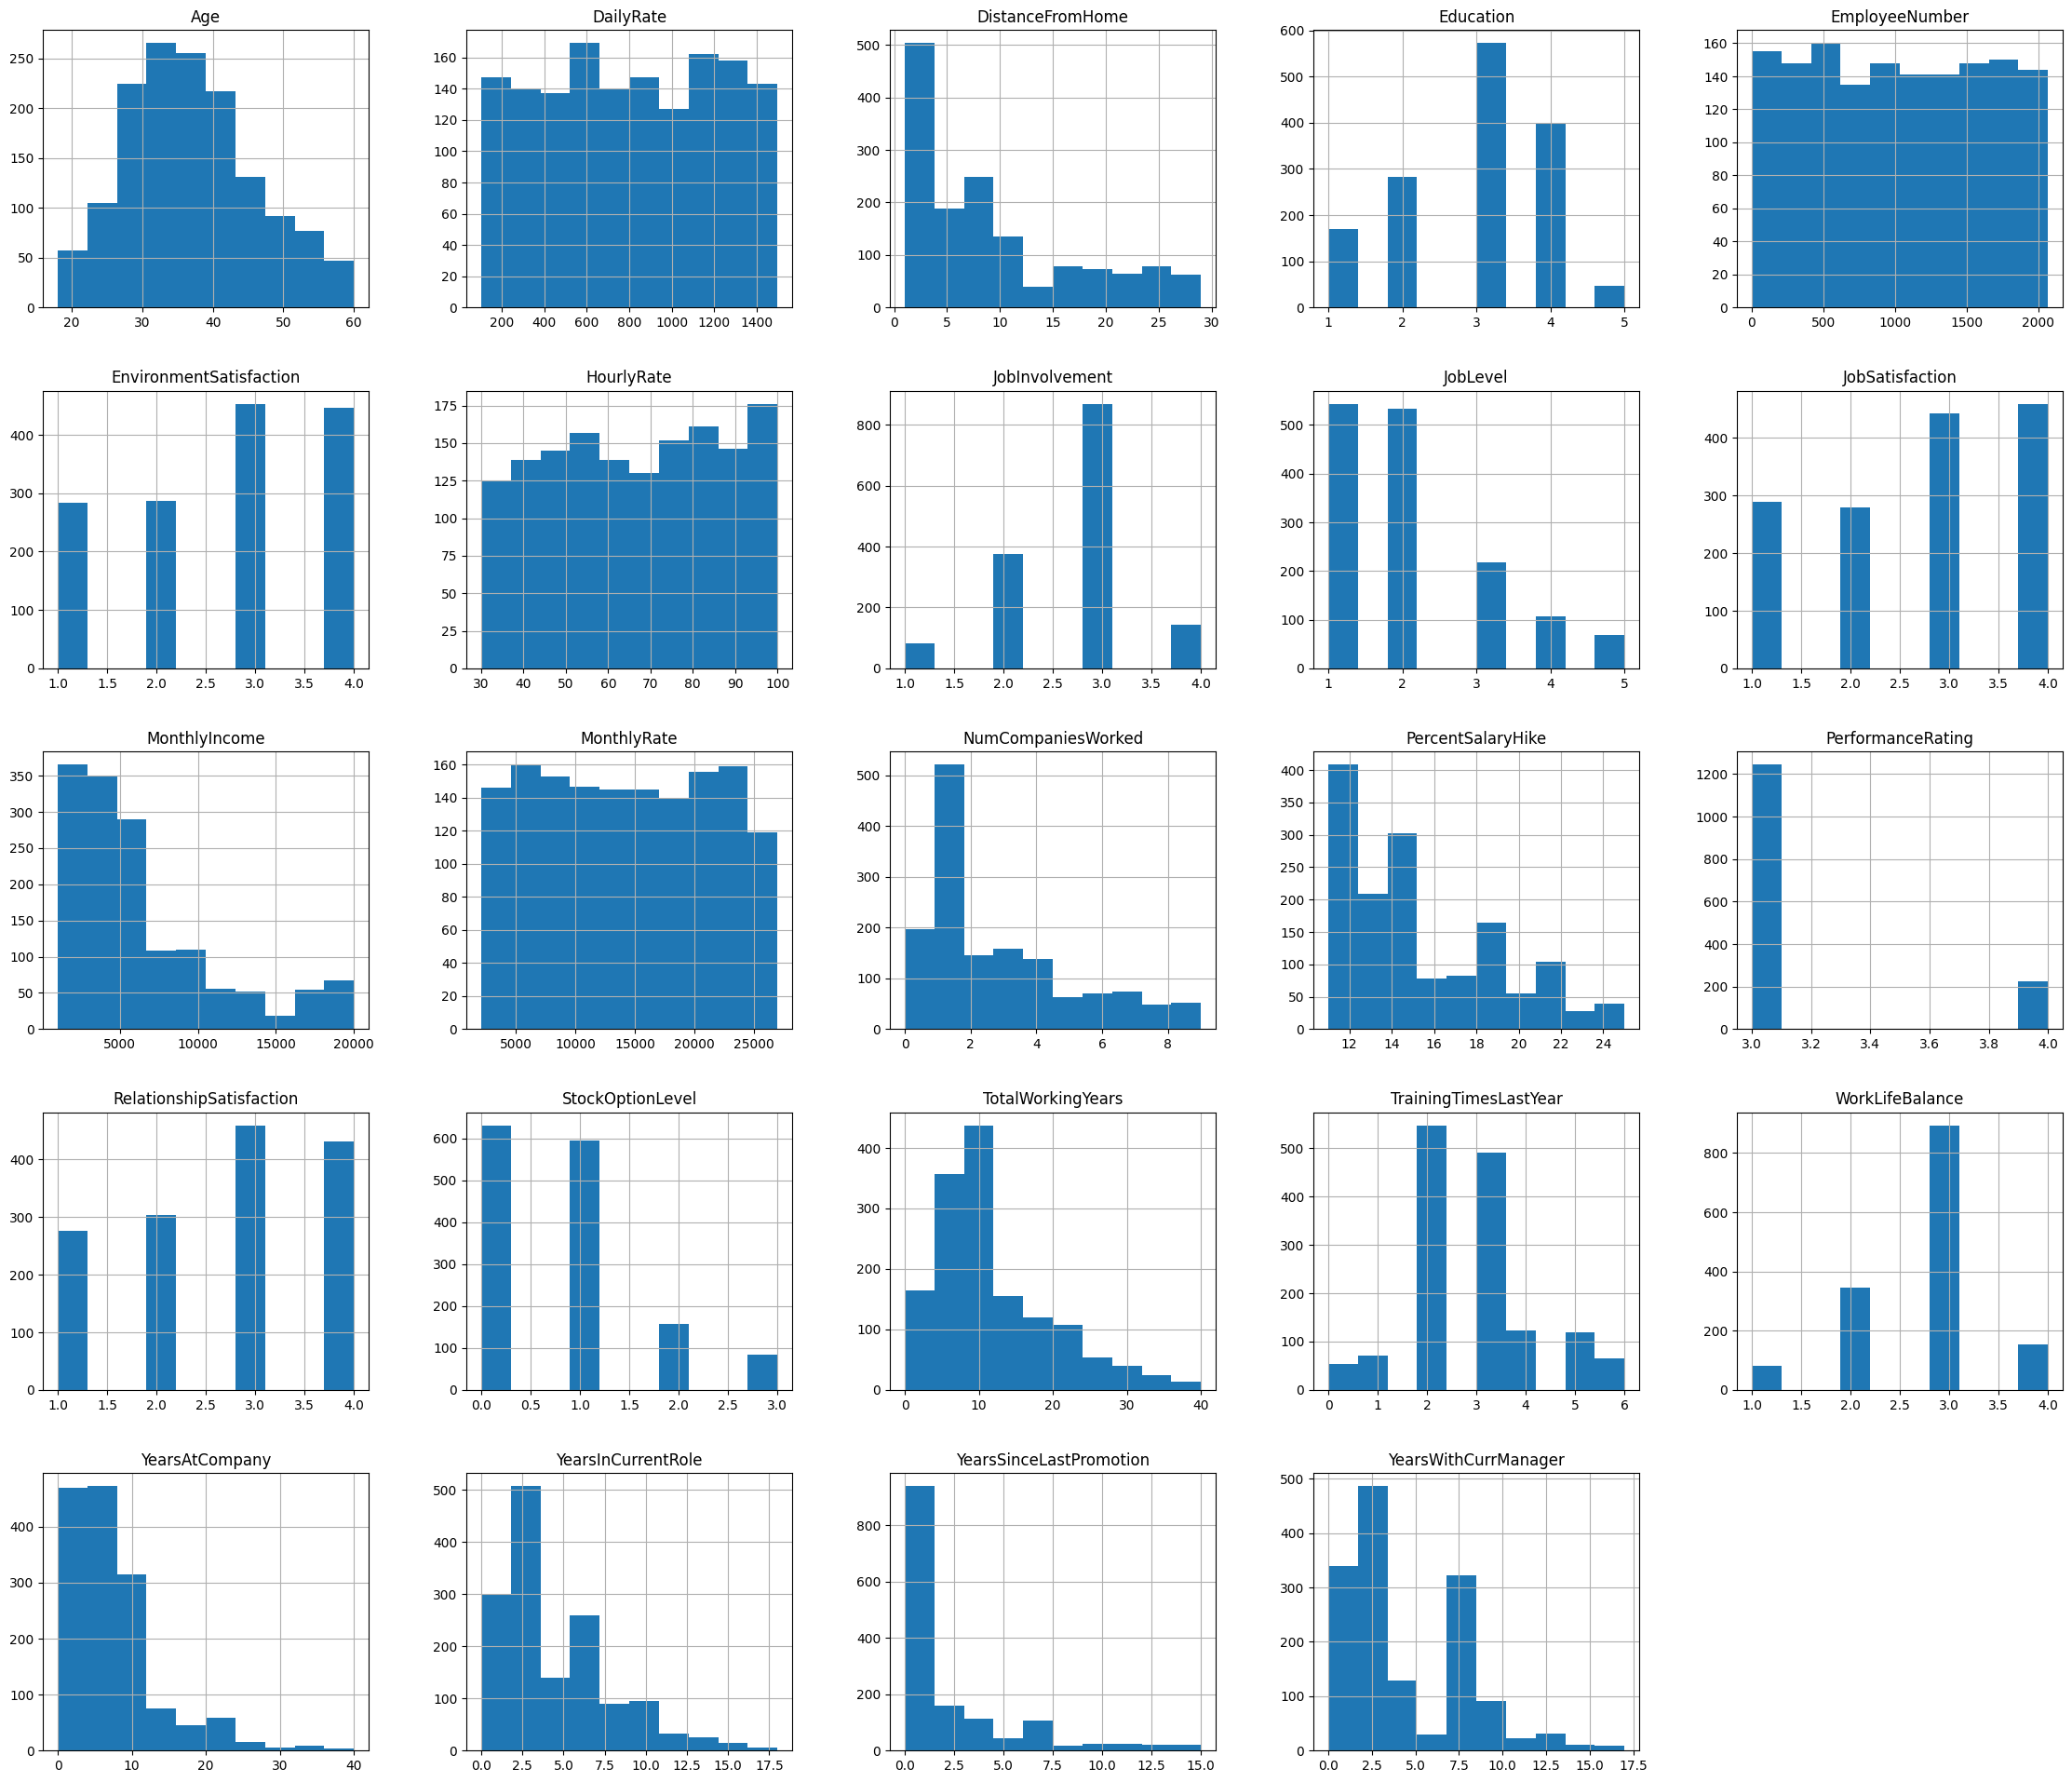

In [12]:
data.hist(figsize=(28,24))
plt.show()

No     1233
Yes     237
Name: Attrition, dtype: int64


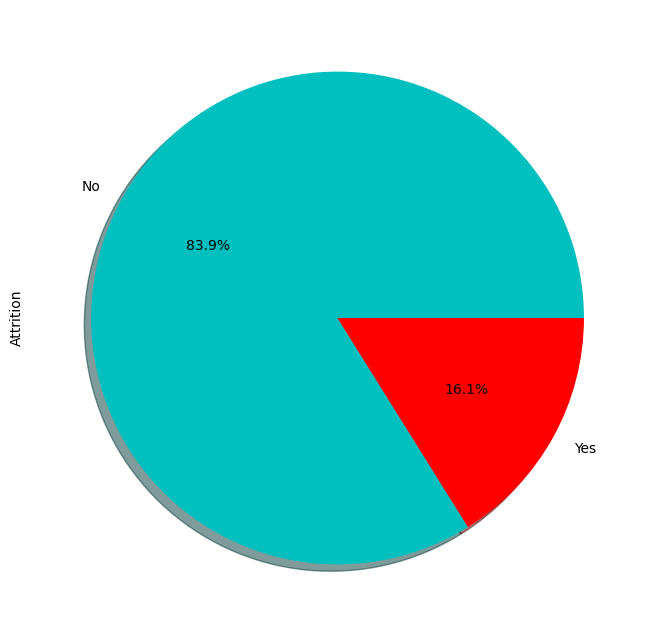

In [13]:
plt.figure(figsize=(20,8))
data['Attrition'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(data['Attrition'].value_counts())

In [14]:
#The numerical columns with high skewness
for i in data.select_dtypes(exclude='O'):
    if data[i].skew() > 0.9:
        print(i, ':', data[i].skew())

DistanceFromHome : 0.9581179956568269
JobLevel : 1.0254012829518246
MonthlyIncome : 1.3698166808390662
NumCompaniesWorked : 1.026471111968205
PerformanceRating : 1.921882702142603
StockOptionLevel : 0.9689803167738937
TotalWorkingYears : 1.1171718528128527
YearsAtCompany : 1.7645294543422085
YearsInCurrentRole : 0.9173631562908262
YearsSinceLastPromotion : 1.9842899833524859


# **Exploratory Data Analysis (EDA):**
Exploring the data to gain a preliminary understanding of its characteristics.It Create visualizations using libraries like matplotlib and seaborn to analyze trends, correlations, and distributions. This step can help to identify potential factors contributing to attrition.(Data Understanding,Data Quality Check, Pattern Identification, Feature Selection, Model Assumptions, Outlier Detection, Data Transformation, Effective Visualization, Hypothesis Generation, Validation of Assumptions, Enhanced Decision Making)

# **1. GENDER vs ATTRITION**

In [15]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['Gender'])

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [16]:
#comparision with MonthlyIncome
pd.pivot_table (data=data,index=['Gender'],values=['MonthlyIncome'],aggfunc='mean')

,MonthlyIncome
Gender,
Female,6686.566327
Male,6380.507937


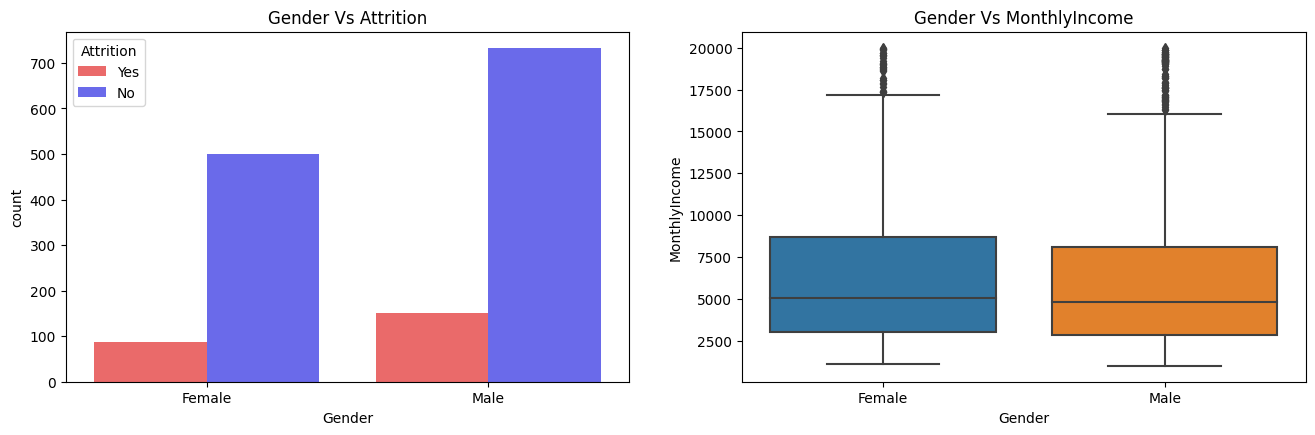

In [17]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('Gender Vs Attrition')
sns.countplot(x=data['Gender'],hue=data['Attrition'],palette='seismic_r')
plt.subplot(222)
plt.title('Gender Vs MonthlyIncome')
sns.boxplot(x=data['Gender'],y=data['MonthlyIncome'])
plt.show()

Key Inferences from the above Gender vs Attrition
• Males have a higher rate of attrition
• Females are earning a little higher than male

# **2. DEPARTMENT vs ATTRITION**

In [18]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['Department'])

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [19]:
#comparision with MonthlyIncome
pd.pivot_table(data=data,index=['Department'],values=['MonthlyIncome'],aggfunc='mean')

,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


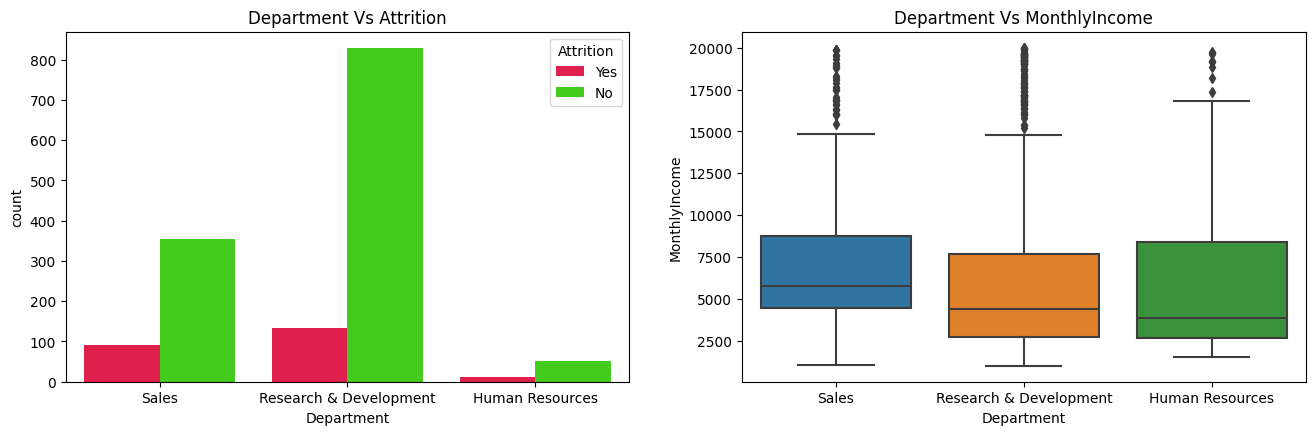

In [20]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('Department Vs Attrition')
sns.countplot(x=data['Department'],hue=data['Attrition'],palette='prism_r')
plt.subplot(222)
plt.title('Department Vs MonthlyIncome')
sns.boxplot(x=data['Department'],y=data['MonthlyIncome'])
plt.show()

Key Inferences from the above Department vs Attrition
• Sales Department has a higher rate of attrition
• Sales employees are earning a little higher than other

# **3. JOB ROLE vs ATTRTION**

In [21]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['JobRole'])

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


In [22]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['JobRole'])

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


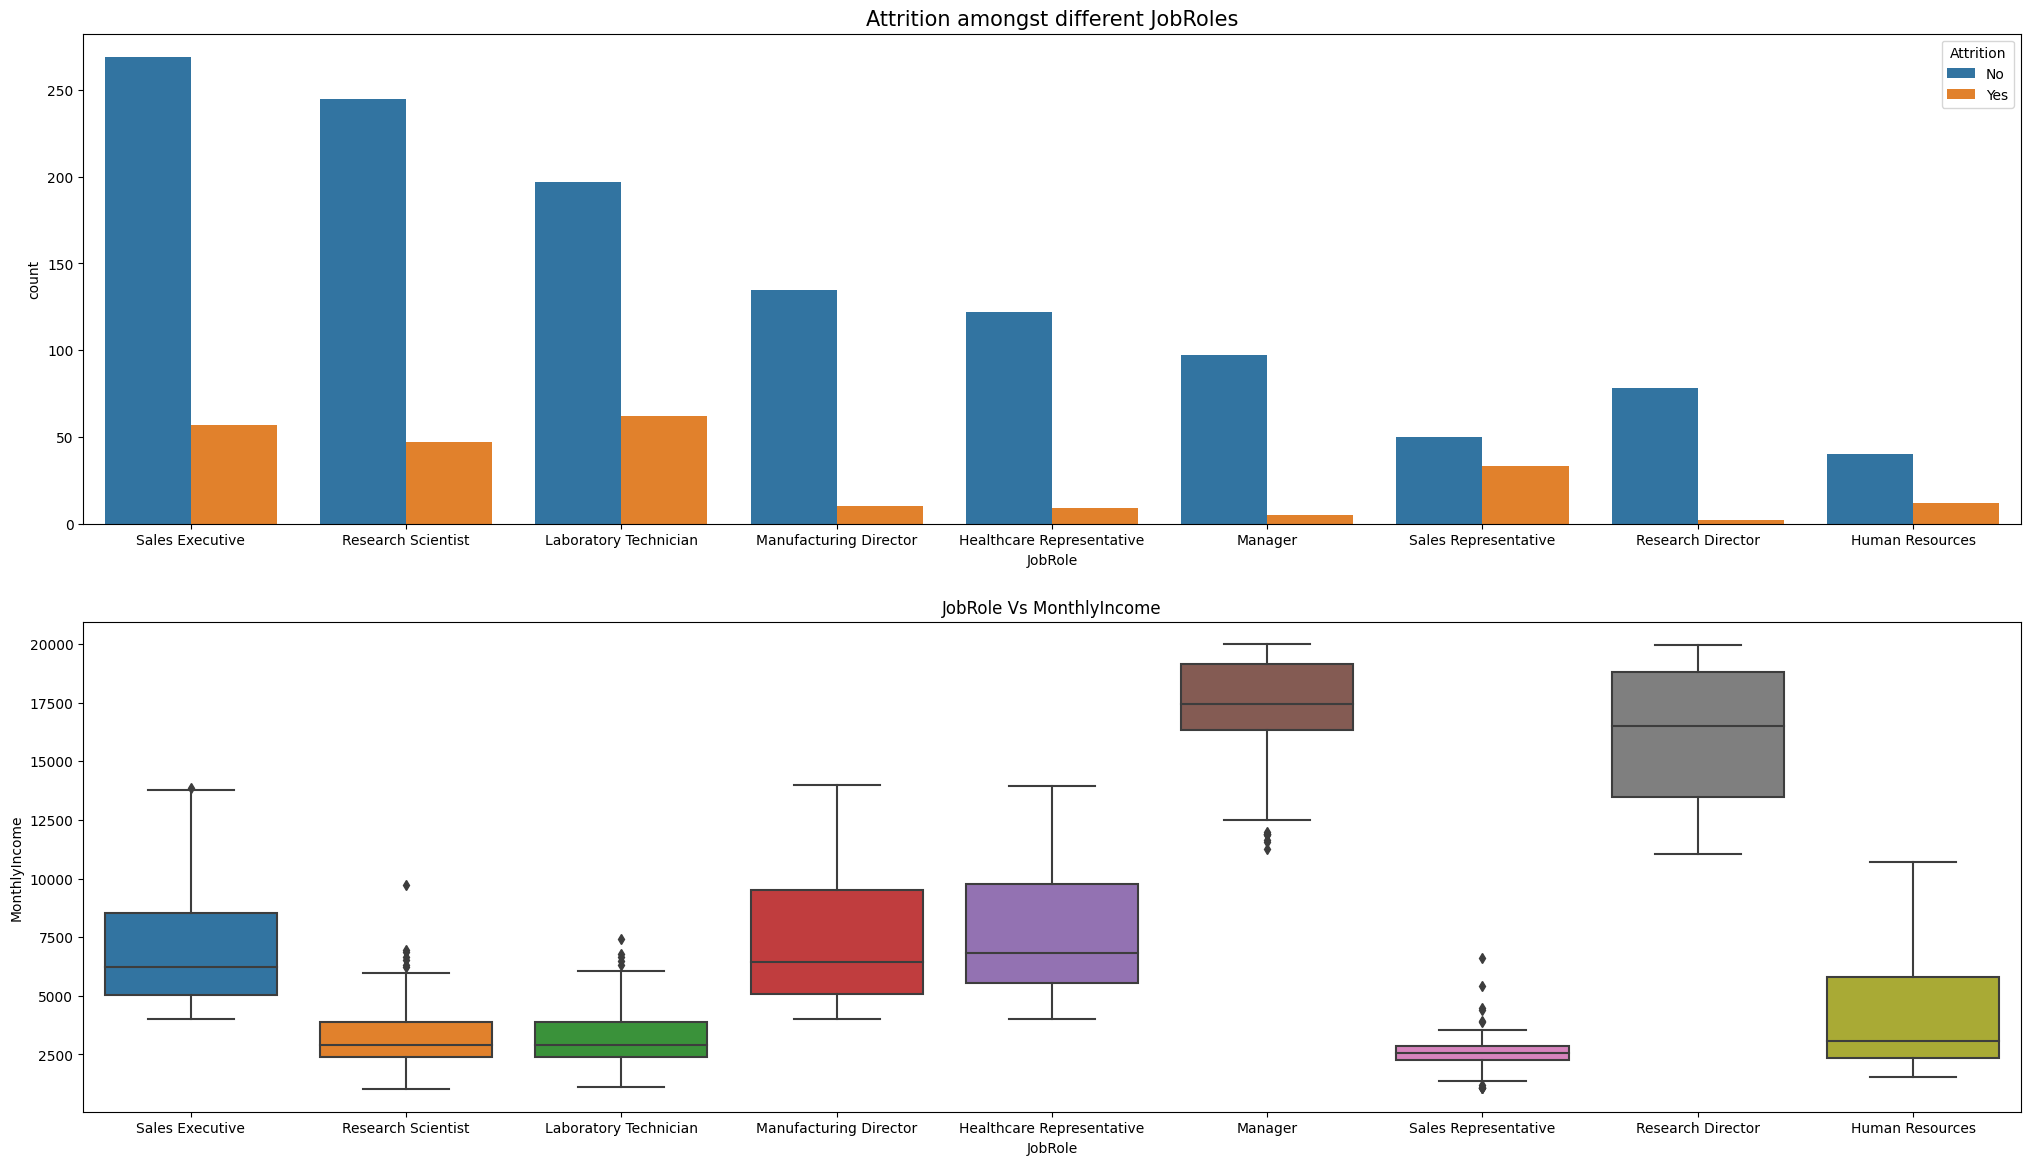

In [23]:
plt.figure(figsize=(25,14))
plt.subplot(211)
plt.title('JobRole Vs Attrition')
sns.countplot(x=data['JobRole'],hue=data['Attrition'].sort_values(ascending=True))
plt.title('Attrition amongst different JobRoles',size=15)
plt.subplot(212)
plt.title('JobRole Vs MonthlyIncome')
sns.boxplot(x=data['JobRole'],y=data['MonthlyIncome'])
plt.show()

Key Inferences from JobRole vs Attrition
• Sales Representative and Lab Technicians have a high attrition rate.

# **4. Years In Current Role vs Attrition**

In [24]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['YearsInCurrentRole'])

YearsInCurrentRole,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Attrition,,,,,,,,,,,,,,,,,,,
No,171,46,304,119,89,35,35,191,82,61,27,22,9,13,10,6,7,4,2
Yes,73,11,68,16,15,1,2,31,7,6,2,0,1,1,1,2,0,0,0


In [25]:
#comparision with MonthlyIncome
pd.pivot_table(data=data,index=['YearsInCurrentRole'],values=['MonthlyIncome'],aggfunc='mean')

,MonthlyIncome
YearsInCurrentRole,
0,5082.487705
1,5416.298246
2,5179.615591
3,5522.644444
4,6153.701923
5,5502.333333
6,10585.945946
7,7237.351351
8,8563.808989


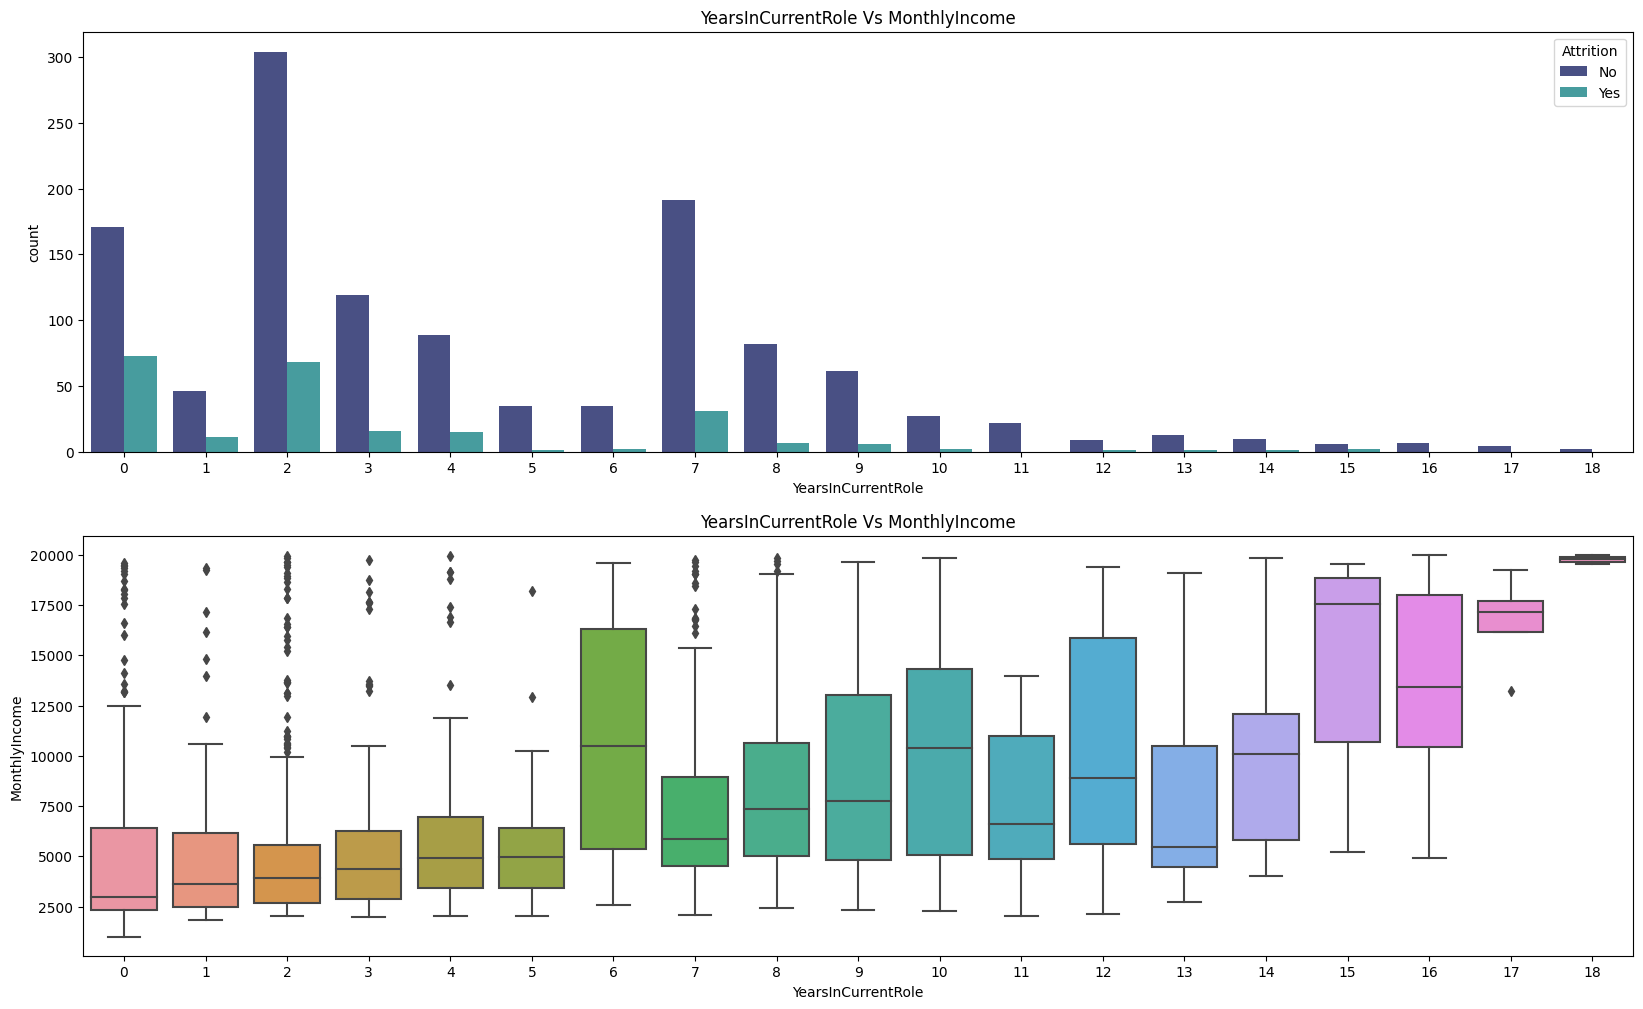

In [26]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.countplot(x=data['YearsInCurrentRole'],hue=data['Attrition'].sort_values(ascending=True),palette='mako')
plt.subplot(212)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.boxplot(x=data['YearsInCurrentRole'],y=data['MonthlyIncome'])
plt.show()

Key Inferences from YearsInCurrentRole vs Attrition:
• Employees with 7,8 and 9 YearsInCurrentRole contribute to 21.5% of the total attrition rate in the organisation
• Employee with 6 years in Current Role is earning more than an employee carrying 14 years in Current Role
• Need to come up with better stock options for people with more than 6+ years in Current Role as attrition seems to increase
gradually with a drop in monthly income.

# **5. TotalWorkingYears vs Attrition**

In [27]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['TotalWorkingYears'])

TotalWorkingYears,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,40
Attrition,,,,,,,,,,,,,,,,,,,,,
No,6,41,22,33,51,72,103,63,87,86,...,7,8,9,6,4,3,6,4,1,0
Yes,5,40,9,9,12,16,22,18,16,10,...,0,1,0,1,1,0,0,0,0,2


In [28]:
#comparision with MonthlyIncome
pd.pivot_table(data=data,index=['TotalWorkingYears'],values=['MonthlyIncome'],aggfunc='mean').sort_values(by='TotalWorkingYears')

,MonthlyIncome
TotalWorkingYears,
0,1523.636364
1,2208.827160
2,2650.193548
3,2781.047619
4,3614.428571
5,3476.659091
6,4215.256000
7,4171.308642
8,4209.252427


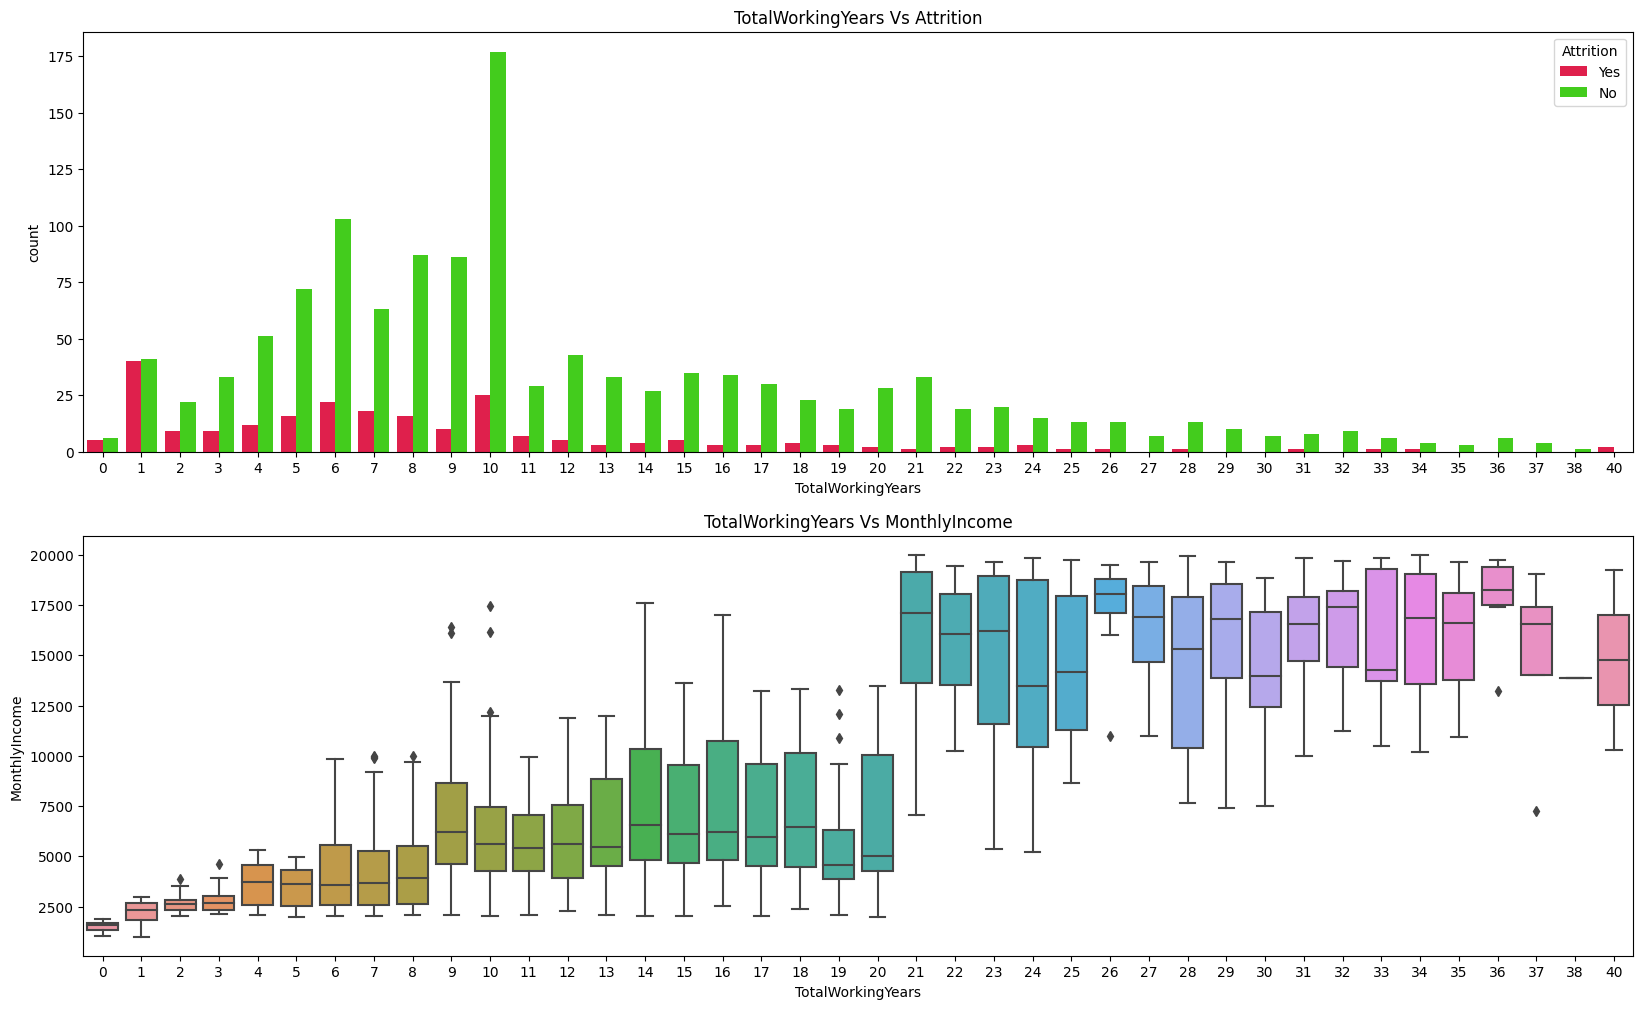

In [29]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('TotalWorkingYears Vs Attrition')
sns.countplot(x=data['TotalWorkingYears'],hue=data['Attrition'],palette='prism_r')
plt.subplot(212)
plt.title('TotalWorkingYears Vs MonthlyIncome')
sns.boxplot(x=data['TotalWorkingYears'],y=data['MonthlyIncome'])
plt.show()

Key Inferences from TotalWorkingYears vs Attrition
• An innovative structure needs to be implemented for employees with 1 year of experience as it is majorly contributing to the
attrition %
• Seems like the organisation has benefits in terms of income for people with 20+ years of experience
• Why people with 6 years of experience earning the same as employees with 19 years of experience ?
• Why employees with 21 years of work experience earning as much as an employee with 40 years of experience?

# **Statistical Analysis**  

We can perform an attrition analysis using statistics to gain insights, Statistical analysis in attrition refers to the use of various statistical techniques and methods to analyze and understand the factors, trends, and patterns associated with employee turnover or attrition within a human resources context. The goal of statistical analysis in attrition is to extract meaningful insights from data in order to make informed decisions about employee retention strategies, workforce planning, and organizational improvements.



* H0=Feature = Attrition
* H1=Feature!= Attrition
to formulate a hypothesis with Gender ,
* h0=mu male = mu female
* h1=mu male!= mu female
to formulate a hypothesis with Department ,
* h0=mu Sales = mu Research & Development= mu Human Resources
* h1=mu Sales = mu Research & Development= mu Human Resources




In [30]:
from scipy.stats import chi2_contingency,chisquare,f_oneway


# **1. Statistical analysis for categorical data types, Chisquare is performed**







Chi-Square Test:
The Chi-Square Test is used to determine whether there is a significant association between two categorical variables. It assesses whether the observed distribution of data in a contingency table (cross-tabulation of two categorical variables) differs significantly from what would be expected under a null hypothesis of no association.


1.  Chi-Square Test for Independence: Tests whether two categorical variables are independent of each other.
2. Chi-Square Test of Goodness of Fit: Tests whether an observed frequency distribution fits an expected theoretical distribution.
ex: Testing whether there's a significant association between job satisfaction levels and attrition rates.



In [31]:
cat_cols = list(data.describe(include = "O").columns)
print(cat_cols)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [32]:
chi_stat = []
p_value = []

for i in cat_cols:
    chi_res = chi2_contingency(np.array(pd.crosstab(data[i], data['Attrition'])))
    chi_stat.append(chi_res[0])
    p_value.append(chi_res[1])

chi_square = pd.DataFrame([chi_stat, p_value])
chi_square = chi_square.T
col = ['Chi Square Value', 'P-Value']
chi_square.columns = col
chi_square.index = cat_cols

In [33]:
chi_square

,Chi Square Value,P-Value
Attrition,1462.614554,0.000000e+00
BusinessTravel,24.182414,5.608614e-06
Department,10.796007,4.525607e-03
EducationField,16.024674,6.773980e-03
Gender,1.116967,2.905724e-01
JobRole,86.190254,2.752482e-15
MaritalStatus,46.163677,9.455511e-11
OverTime,87.564294,8.158424e-21


In [34]:
#Obtaining categorical feature with P-value<0.05, means these features are dependent and have correlation with target variable
chi_square[chi_square["P-Value"]<0.05]

,Chi Square Value,P-Value
Attrition,1462.614554,0.000000e+00
BusinessTravel,24.182414,5.608614e-06
Department,10.796007,4.525607e-03
EducationField,16.024674,6.773980e-03
JobRole,86.190254,2.752482e-15
MaritalStatus,46.163677,9.455511e-11
OverTime,87.564294,8.158424e-21


In [35]:
features_p = list(chi_square[chi_square["P-Value"]<0.05].index)
print("Significant categorical Features:\n",features_p)

Significant categorical Features:
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


# **2. statistical analysis for numerical data types , ANOVA Test is performed**

Analysis of Variance (ANOVA):
ANOVA is used to compare the means of two or more groups to determine whether there are statistically significant differences among them. It's particularly useful when you have more than two groups to compare. ANOVA assesses whether the observed variance between group means is greater than what would be expected due to random chance.



1.One-Way ANOVA: Used when there's one independent variable (factor) and multiple levels or groups.
2. Two-Way ANOVA: Used when there are two independent variables, examining their individual and interactive effects.
ex: Analyzing whether there are significant differences in average salaries across different job roles in a company.




In [36]:
num_cols = list(data.describe(include='number').columns)

# Print numerical columns one by one on separate lines
for col in num_cols:
    print(col)

Age
DailyRate
DistanceFromHome
Education
EmployeeNumber
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [37]:
f_stat = []
p_val = []

for i in num_cols:
    atr_0 = data[data['Attrition'] == "No"][i]
    atr_1 = data[data['Attrition'] == "Yes"][i]
    a = f_oneway(atr_0, atr_1)
    f_stat.append(a[0])
    p_val.append(a[1])

anova = pd.DataFrame([f_stat, p_val])
anova = anova.T
cols = ['F-STAT', 'P-VALUE']
anova.columns = cols
anova.index = num_cols





In [38]:
anova

,F-STAT,P-VALUE
Age,38.175887,8.356308e-10
DailyRate,4.726640,2.985816e-02
DistanceFromHome,8.968277,2.793060e-03
Education,1.446308,2.293152e-01
EmployeeNumber,0.164255,6.853276e-01
EnvironmentSatisfaction,15.855209,7.172339e-05
HourlyRate,0.068796,7.931348e-01
JobInvolvement,25.241985,5.677065e-07
JobLevel,43.215344,6.795385e-11
JobSatisfaction,15.890004,7.043067e-05


In [39]:
features_p_n = list(anova[anova["P-VALUE"]<0.05].index)
print("Significant numerical Features:\n",features_p_n)

Significant numerical Features:
 ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


Key Inference of Statistical Analysis
There are 20 Features having a correlation with the Target Variable. These are:



   'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'Age', 'DailyRate',
'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel',
'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManage


